# Import Library

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets

In [2]:
df_customers = pd.read_csv("Case Study Data Scientist\Case Study - Customer.csv", sep=';')
df_products = pd.read_csv("Case Study Data Scientist\Case Study - Product.csv", sep=';')
df_stores = pd.read_csv("Case Study Data Scientist\Case Study - Store.csv", sep=';')
df_transactions = pd.read_csv("Case Study Data Scientist/Case Study - Transaction.csv", sep=';')

## Preview Datasets
Dalam preview datasets, kita akan melihat lima data teratas dari masing-masing datasets. Kemudian akan dilkaukan pengecekkan tipe-tipe data pada masing-masing datasets beserta apakah terdapat atau tidaknya nilai null pada datasets. 

### Customers Datasets

In [3]:
df_customers.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [4]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [5]:
df_customers.isna().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

### Product Datasets

In [6]:
df_products.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [7]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [8]:
df_products.isna().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

### Stores Datasets

In [9]:
df_stores.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [10]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [11]:
df_stores.isna().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

### Transactions Datasets

In [12]:
df_transactions.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [13]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [14]:
df_transactions.isna().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

Dari preview keempat datasets diatas, dapat diketahui hal-hal berikut:
- Pada datasets customers terdapat nilai null pada kolom 'Marital Status'. Pada datasets yang sama kolom 'Income' memiliki tipe object, seharusnya kolom tersebut bertipe data float dikarenakan kolom terebut merujuk pada pendapatan tiap customer.
- Pada datasets stores kolom 'latitude' dan 'langitude' seharusnya beripe float bukan object.
- Pada datasets transactions kolom 'Date' seharusnya bertipe datetime dikarenakan kolom tersebut menunjukkan waktu.

# Cleaning Datasets

## Customers Datasets

In [15]:
# Ubah tipe data pada kolom Income
df_customers['Income'] = df_customers['Income'].replace('[,]', '.', regex=True).astype('float')

In [16]:
# Isi data Marital Status yang kosong menjadi 'Unknown'
df_customers['Marital Status'] = df_customers['Marital Status'].fillna('Unknown')

In [17]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      447 non-null    int64  
 1   Age             447 non-null    int64  
 2   Gender          447 non-null    int64  
 3   Marital Status  447 non-null    object 
 4   Income          447 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 17.6+ KB


Kita tidak dapat mmebuang data Customers yang memiliki nilai null pada salah satu kolomnya dikarenakan data customers tersebut terhubung dengan datasets transactions. Oleh karena itu, data yang null pada kolom 'Marital Status' diisi dengan 'Unknown' dikarenakan kita tidak mengetahui Status pernikahan dari customers tersebut.

## Stores Datasets

In [18]:
# ubah tipe data kolom latitude dan longitude
df_stores['Latitude'] = df_stores['Latitude'].replace('[,]', '.', regex=True).astype('float')
df_stores['Longitude'] = df_stores['Longitude'].replace('[,]', '.', regex=True).astype('float')

In [19]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StoreID     14 non-null     int64  
 1   StoreName   14 non-null     object 
 2   GroupStore  14 non-null     object 
 3   Type        14 non-null     object 
 4   Latitude    14 non-null     float64
 5   Longitude   14 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 800.0+ bytes


## Transactions Datasets

In [20]:
df_transactions['Date'] = pd.to_datetime(df_transactions['Date'], format='%d/%m/%Y')

In [21]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 313.9+ KB


# Merge Datasets

In [22]:
# Buat merge df_transactions dan df_customers
df_merge = pd.merge(df_transactions, df_customers, how='inner', on='CustomerID')

# merge hasil merge sebelumnya/df_merge dengan df_products
df_merge = pd.merge(df_merge, df_products[['ProductID', 'Product Name']], how='inner', on='ProductID')

# merge hasil merge sebelumnya/df_merge dengan df_stores
df_merge = pd.merge(df_merge, df_stores, how='inner', on='StoreID')

In [23]:
df_all = df_merge.copy()

# Descriptive Analysis

In [24]:
df_all.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-01-08,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-01-10,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


In [25]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price           5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Age             5020 non-null   int64         
 9   Gender          5020 non-null   int64         
 10  Marital Status  5020 non-null   object        
 11  Income          5020 non-null   float64       
 12  Product Name    5020 non-null   object        
 13  StoreName       5020 non-null   object        
 14  GroupStore      5020 non-null   object        
 15  Type

In [26]:
print("Banyak baris dan kolom dari seluruh datasets adalah sebanyak {} baris dan {} kolom".format(df_all.shape[0], df_all.shape[1]))

Banyak baris dan kolom dari seluruh datasets adalah sebanyak 5020 baris dan 18 kolom


In [27]:
df_all.describe(include='number')

,CustomerID,Price,Qty,TotalAmount,StoreID,Age,Gender,Income,Latitude,Longitude
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,221.263745,9684.800797,3.644622,32279.482072,7.489841,40.003586,0.452988,8.623713,-2.942236,109.600789
std,129.672955,4600.708780,1.855295,19675.462455,4.028502,12.834719,0.497835,6.518242,4.323225,8.357593
min,1.000000,3200.000000,1.000000,7500.000000,1.000000,0.000000,0.000000,0.000000,-7.797068,95.323753
25%,108.000000,4200.000000,2.000000,16000.000000,4.000000,30.000000,0.000000,4.220000,-6.914864,104.756554
50%,221.000000,9400.000000,3.000000,28200.000000,7.000000,39.000000,0.000000,7.720000,-5.135399,110.370529
75%,332.000000,15000.000000,5.000000,47000.000000,11.000000,51.000000,1.000000,10.780000,0.533505,114.590111
max,447.000000,18000.000000,10.000000,88000.000000,14.000000,72.000000,1.000000,71.300000,5.548290,128.190643


In [28]:
df_all.describe(include='object')

,TransactionID,ProductID,Marital Status,Product Name,StoreName,GroupStore,Type
count,5020,5020,5020,5020,5020,5020,5020
unique,4908,10,3,10,12,7,2
top,TR71313,P5,Married,Thai Tea,Lingga,Prima,General Trade
freq,3,814,3779,814,738,1085,2851


# Forecast Qty

## Time Series Analysis

In [29]:
df_all[['Date', 'Qty']].sort_values('Date')

,Date,Qty
0,2022-01-01,4
4814,2022-01-01,7
337,2022-01-01,4
3042,2022-01-01,2
3288,2022-01-01,2
...,...,...
2827,2022-12-31,5
2174,2022-12-31,2
2749,2022-12-31,4
401,2022-12-31,3


In [30]:
df_tsa = df_all[['Date', 'Qty']]

In [31]:
df_tsa = df_tsa.groupby('Date').sum()

In [32]:
df_tsa

,Qty
Date,
2022-01-01,49
2022-01-02,59
2022-01-03,63
2022-01-04,45
2022-01-05,30
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


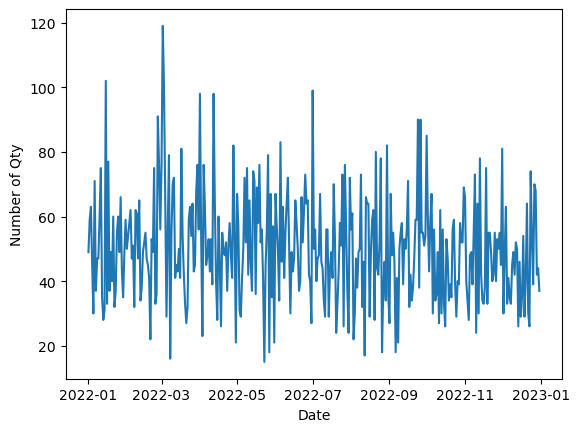

In [33]:
plt.xlabel('Date')
plt.ylabel('Number of Qty')
plt.plot(df_tsa)

In [34]:
df_tsa.resample('M').sum()

,Qty
Date,
2022-01-31,1560
2022-02-28,1441
2022-03-31,1753
2022-04-30,1554
2022-05-31,1589
2022-06-30,1592
2022-07-31,1532
2022-08-31,1492
2022-09-30,1499


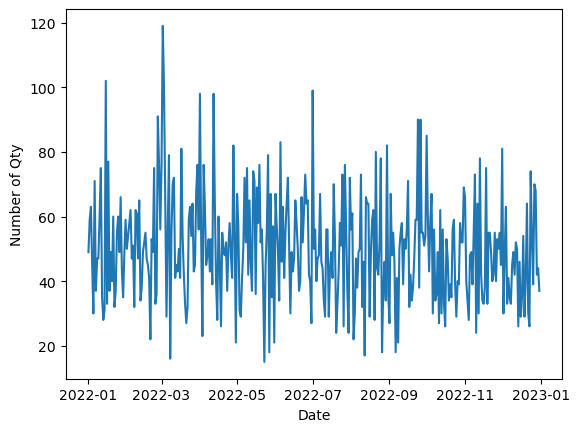

In [35]:
## plot graph
plt.xlabel('Date')
plt.ylabel('Number of Qty')
plt.plot(df_tsa.resample('D').mean())

### STL

In [36]:
from statsmodels.tsa.seasonal import STL
import statsmodels.api as sm

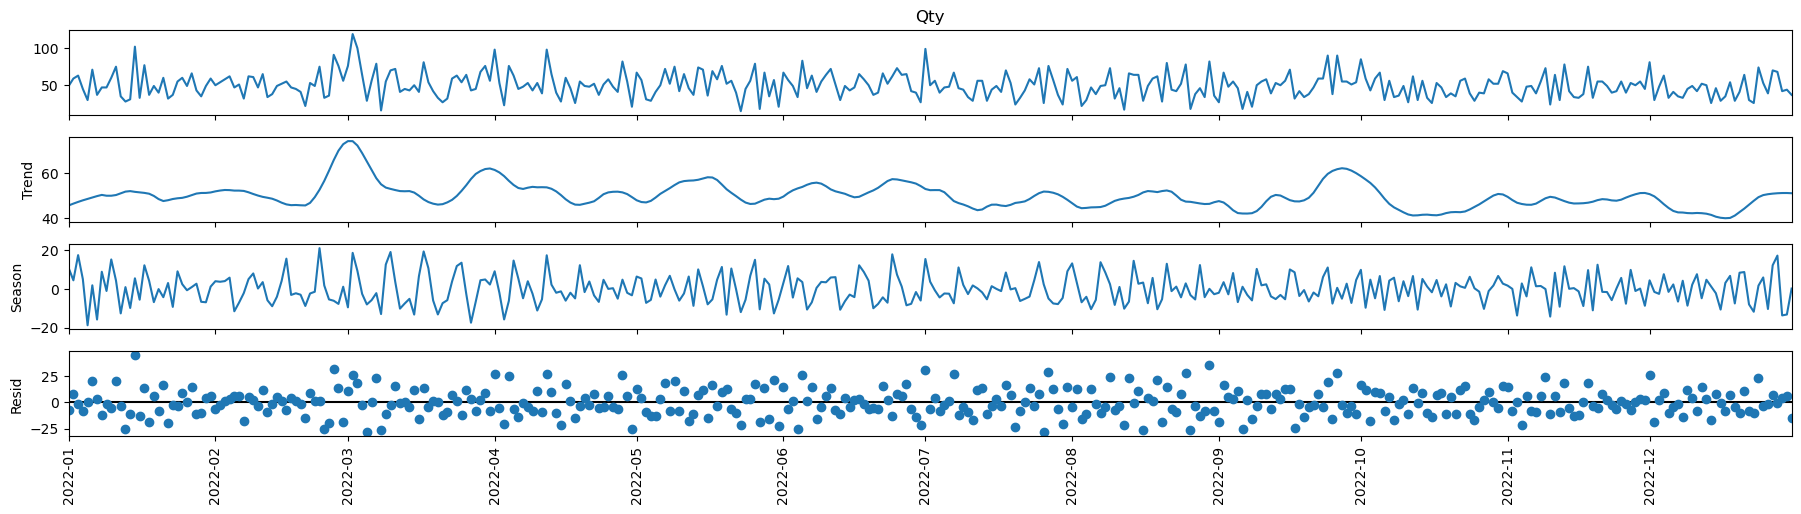

In [66]:
res = STL(df_tsa['Qty']).fit()
fig = res.plot()
fig.set_figwidth(20)
plt.xticks(rotation=90)
plt.show()

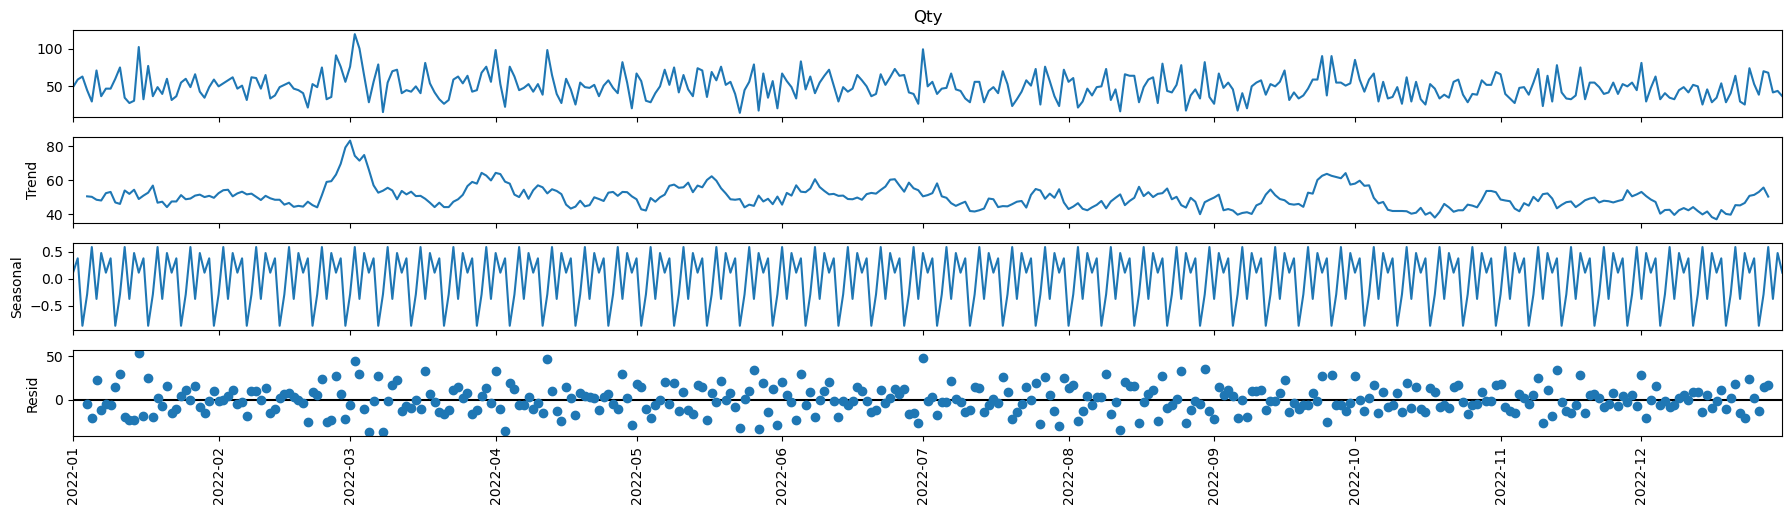

In [71]:
fig = sm.tsa.seasonal_decompose(df_tsa['Qty']).plot()
fig.set_figwidth(20)
plt.xticks(rotation=90)
plt.show()

### Data Stationary or Not

#### Using rolling and graphic

In [126]:
# Ganti semua nanti
n_split = 5
splited_data = np.array_split(df_tsa['Qty'].values, n_split)

In [127]:
ls_mean = []
ls_var = []
for i in splited_data:
    ls_mean.append(i.mean())
    ls_var.append(i.var())

In [128]:
mv_mean_var = pd.DataFrame({
    'moving_mean': ls_mean,
    'moving_var': ls_var
})

In [129]:
mv_mean_var

,moving_mean,moving_var
0,52.958904,347.299681
1,52.506849,286.551323
2,49.657534,253.430662
3,48.958904,285.792832
4,46.547945,190.220304


#### ADF Method

In [73]:
from statsmodels.tsa.stattools import adfuller

In [147]:
adf_result = adfuller(df_tsa)

In [148]:
print('ADF Statistic: {:.4f}'.format(adf_result[0]))
print('p-value: {:.4f}'.format(adf_result[1]))
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t{}: {:.3f}'.format(key, value))
if adf_result[1] > 0.05:
    print("Accept H0: Data is Non-Stationary")
else:
    print("Reject H0: Data is Stationary")

ADF Statistic: -19.4481
p-value: 0.0000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571
Reject H0: Data is Stationary


## Forecat Qty with ARIMA

### Find p

In [155]:
from statsmodels.graphics.tsaplots import plot_pacf

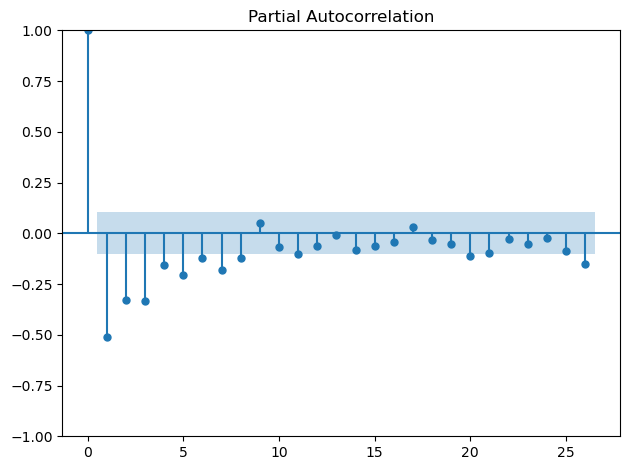

In [156]:
plot_pacf(df_tsa['Qty'].diff().dropna())
plt.tight_layout()
plt.show()

### Find q

In [153]:
from statsmodels.graphics.tsaplots import plot_acf

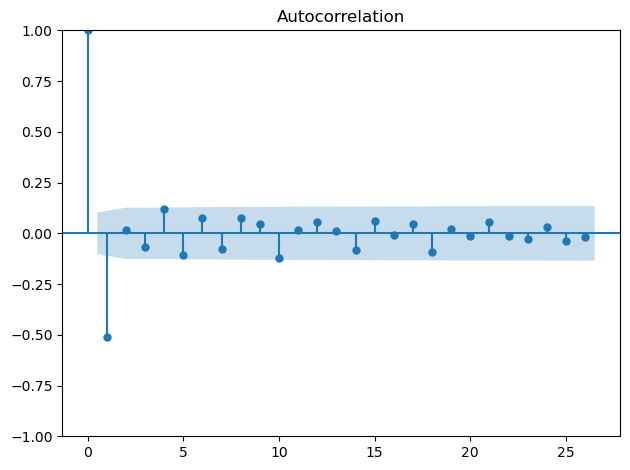

In [157]:
plot_acf(df_tsa['Qty'].diff().dropna())
plt.tight_layout()
plt.show()

# Customers Segmentation Analysis

In [39]:
df_all.head(10)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-01-08,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-01-10,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
5,TR38909,285,2022-03-04,P3,7500,4,30000,12,20,0,Single,0.00,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
6,TR36491,117,2022-01-03,P3,7500,4,30000,12,45,1,Married,12.55,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
7,TR20045,243,2022-01-20,P3,7500,1,7500,12,38,0,Married,3.34,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
8,TR12061,189,2022-03-28,P3,7500,5,37500,12,59,1,Single,5.15,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
9,TR39272,176,2022-12-21,P3,7500,5,37500,12,54,1,Married,18.32,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


In [40]:
# Cek korelasi antara feature
df_corr = df_all.select_dtypes(include='number').corr()

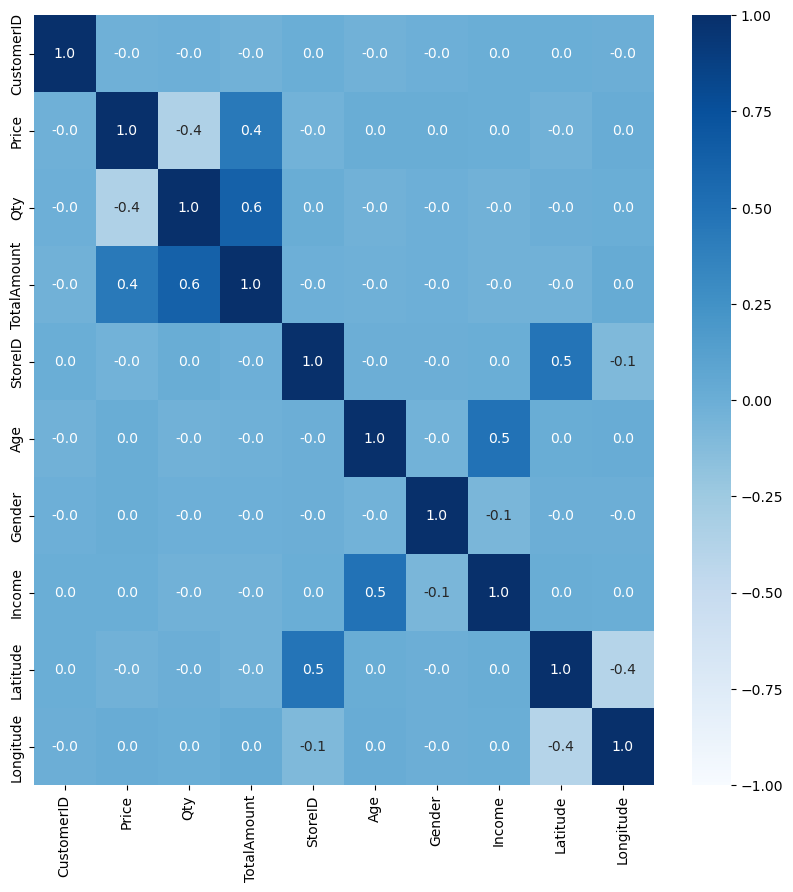

In [41]:
# heatmap korelasi antar feature
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_corr, cmap='Blues', fmt='.1f', annot=True, vmin=-1)
plt.show()

In [42]:
df_cust_seg = df_all.groupby('CustomerID').agg(
    Total_Transactions = ('TransactionID', 'count'),
    Total_Qty = ('Qty', 'sum'),
    Total_Amount = ('TotalAmount', 'sum')
)

In [43]:
df_cust_seg

,Total_Transactions,Total_Qty,Total_Amount
CustomerID,,,
1,17,60,623300
2,13,57,392300
3,15,56,446200
4,10,46,302500
5,7,27,268600
...,...,...,...
443,16,59,485100
444,18,62,577700
445,18,68,587200


In [44]:
df_cust_seg.columns[0]

'Total_Transactions'

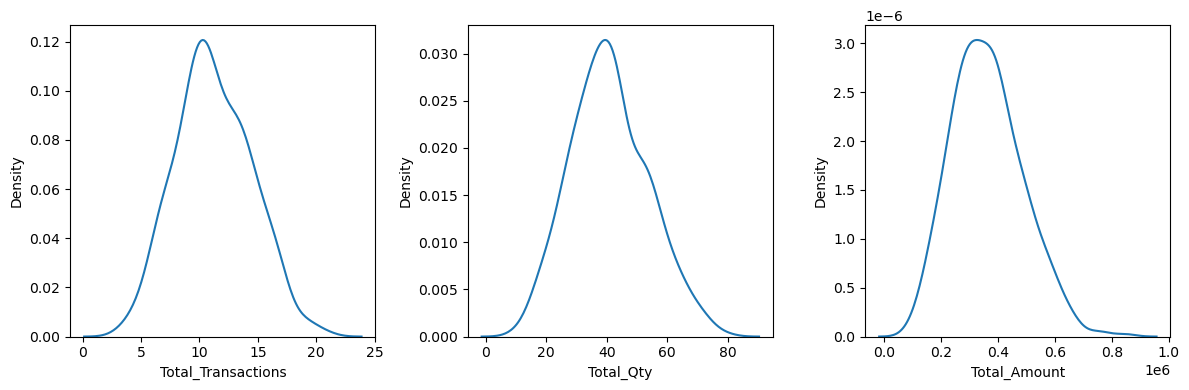

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, ax in enumerate(axes):
    sns.kdeplot(data=df_cust_seg, x=df_cust_seg.columns[i], ax=ax)
plt.tight_layout()
plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [47]:
scaler = StandardScaler()

In [48]:
scaler_data = scaler.fit_transform(df_cust_seg)

In [49]:
scaler_data

array([[ 1.77981554,  1.49652728,  2.09476796],
       [ 0.54588371,  1.26109285,  0.23926861],
       [ 1.16284962,  1.18261471,  0.67221846],
       ...,
       [ 2.08829849,  2.12435243,  1.80479599],
       [-0.0710822 ,  0.0839207 ,  0.48827502],
       [ 0.54588371,  0.0839207 ,  0.61679446]])

In [50]:
inertia = []
k = range(2, 15)
for i in k:
    cls_kmeans = KMeans(i, random_state=42, n_init='auto')
    cls_kmeans.fit(scaler_data)
    inertia.append(cls_kmeans.inertia_)

[543.2539723846328, 316.97171232225145, 238.92828845415715, 192.23003068353094, 174.22264126653658, 153.8498845514683, 149.5275400166079, 132.2331037588006, 124.62506081829912, 117.09522839772899, 111.09415351120064, 105.29772314513322, 102.10788286228511]


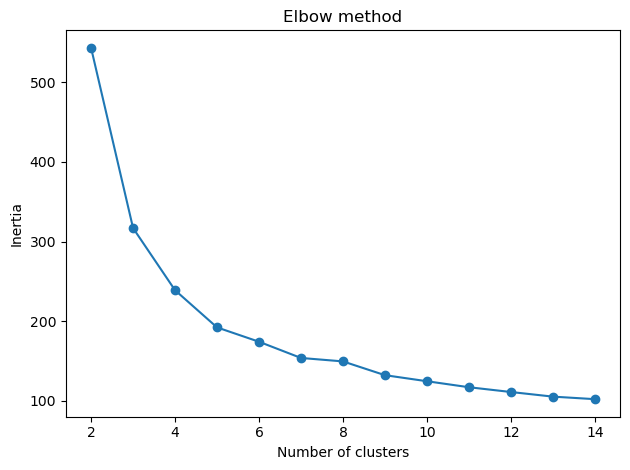

In [51]:
print(inertia)
plt.plot(k, inertia, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()

Jumlah cluster saat garis mulai linear = 5

In [52]:
cls_ml = KMeans(5, n_init='auto', random_state=42)
cls_ml.fit(scaler_data)

KMeans(n_clusters=5, n_init='auto', random_state=42)

In [53]:
seg_result = df_cust_seg.copy()
seg_result['Cluster'] = cls_ml.labels_

In [54]:
seg_result

,Total_Transactions,Total_Qty,Total_Amount,Cluster
CustomerID,,,,
1,17,60,623300,1
2,13,57,392300,4
3,15,56,446200,4
4,10,46,302500,0
5,7,27,268600,2
...,...,...,...,...
443,16,59,485100,4
444,18,62,577700,1
445,18,68,587200,1


In [55]:
seg_result.groupby('Cluster').agg(['mean', 'sum']).round(2).applymap(lambda x: f"{x:,}")

Total_Transactions        Total_Qty        Total_Amount            
                      mean    sum      mean    sum         mean         sum
Cluster                                                                    
0                    11.63  1,547     41.74  5,551   367,429.32  48,868,100
1                    16.69    801     63.12  3,030   584,014.58  28,032,700
2                     6.59    468     22.94  1,629   195,039.44  13,847,800
3                     9.35  1,047     33.46  3,747   290,089.29  32,490,000
4                    13.94  1,157     52.28  4,339   467,522.89  38,804,400

In [56]:
import plotly.express as px

In [57]:
px.scatter_3d(data_frame=seg_result, x='Total_Transactions', y='Total_Qty', z='Total_Amount', color='Cluster', size_max=1, width=700, height=700)